In [240]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [241]:

n = 1000 #точек 
time = 20#фс 20 * 10 ^ (-15)
c = 3. * 10** (8) # м/с


In [242]:
dz = 0.5
dt=0.000625
t=1.
z = 20.
Nt = t / dt
Nz = 2 * z / dz

In [243]:
'''def impulse(x):
    return 2. *(np.cos(-2. * x - np.pi / 2.) + 1j * np.sin(-2. + x - np.pi / 2.))/(np.exp(x) + np.exp(-x))'''
T0=1
def impulse1(z):
    return  np.e ** (-1. * z ** 2 / (2. * T0 ** 2))

In [244]:
t_array = np.arange(0, t, dt)
z_array = np.arange(-20, 20, dz)


In [245]:
q = np.zeros((len(t_array), len(z_array)), dtype=complex)

first_layer = []
for z_i in z_array:
    res = impulse1(z_i)
    first_layer.append(res)
q[0] = first_layer



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


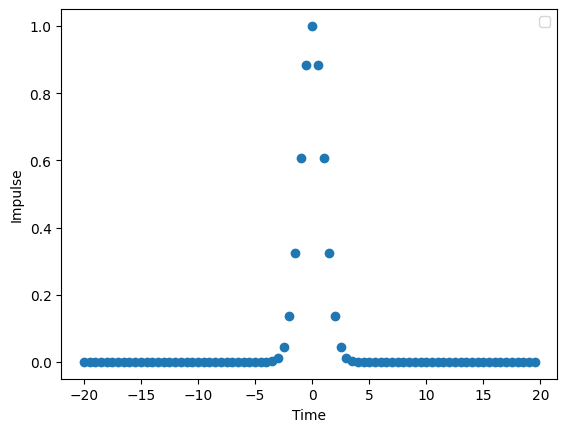

In [246]:
graph = []
for q_i in q[0]:
    graph.append(abs(q_i))

plt.scatter(z_array, graph)
#plt.scatter(t, impulse3)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()


In [247]:
beta2 = 3.

In [248]:
for i in range(0, len(t_array)-1):
    for j in range(0, len(z_array)):
        #q(m+1,n)=q(m-1, n) - 1j *((2dt/(dx)^2) *(q mn+1 -2 q m n +q m n-1)+4dtq^2 (m n) q mn)
        if i == 0:
            if j == 0:
                q[i + 1][j] = 0 - 1j *(beta2 * 2 * dt/(dz)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j + 1])
            else:
                if j == len(z_array) - 1:
                    q[i + 1][j] = 0 - 1j *(beta2 * 2 * dt/(dz)**2) *(q[i][j - 1] -2 * q[i][j] + q[i][j - 1])
                else:
                    q[i + 1][j] = 0 - 1j *(beta2 * 2 * dt/(dz)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1])
        else:
            if j == 0:
                q[i + 1][j] = q[i - 1][j] - 1j *((beta2 * 2 * dt/(dz)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j + 1]))
            else:
                if j == len(z_array) - 1:
                    q[i + 1][j] = q[i - 1][j] - 1j *((beta2 * 2 * dt/(dz)**2) *(q[i][j - 1] -2 * q[i][j] + q[i][j - 1]))
                else:
                    q[i + 1][j] = q[i - 1][j] - 1j *((beta2 * 2 * dt/(dz)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1]))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


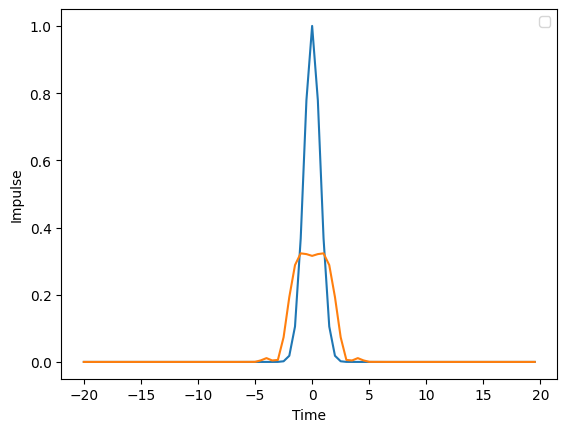

In [250]:
graph1 = []
for q_i in q[0]:
    graph1.append(abs(q_i)**2)

graph2 = []
for q_i in q[550]:
    graph2.append(abs(q_i) ** 2)  

'''graph3 = []
for q_i in q[999]:
    graph3.append(abs(q_i) ** 2)  ''' 

plt.plot(z_array, graph1)
plt.plot(z_array, graph2)
#plt.scatter(t, impulse3)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()